In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dahack/Data Analytics Hackathon Dataset/iraste_nxt_casdms.csv
/kaggle/input/dahack/Data Analytics Hackathon Dataset/iraste_nxt_cas.csv


In [62]:
set1=pd.read_csv('/kaggle/input/dahack/Data Analytics Hackathon Dataset/iraste_nxt_casdms.csv')
set2=pd.read_csv("/kaggle/input/dahack/Data Analytics Hackathon Dataset/iraste_nxt_cas.csv")

In [63]:
set1.head()


,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_hmw,2022-05-01,00:00:29,17.158688,79.306623,3867,55
1,cas_ldw,2022-05-01,00:00:52,17.158928,79.309335,3867,60
2,cas_ldw,2022-05-01,00:01:03,17.159078,79.310747,3867,67
3,cas_ldw,2022-05-01,00:01:16,17.159457,79.314245,3867,73
4,cas_ldw,2022-05-01,00:01:27,16.814285,80.246173,6123,61


In [64]:
set2.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-05-01,00:00:06,14.196872,77.631213,3829.0,58
1,cas_ldw,2022-05-01,00:00:07,16.511887,80.746034,8111.0,56
2,cas_ldw,2022-05-01,00:00:11,17.908537,78.464064,1153.0,74
3,cas_ldw,2022-05-01,00:00:11,13.152203,77.620431,7103.0,72
4,cas_ldw,2022-05-01,00:00:15,16.512134,80.748452,8111.0,57


In [65]:
set1.nunique()

Alert         11
Date          30
Time       43247
Lat        46024
Long       54261
Vehicle        5
Speed         97
dtype: int64

In [66]:
set2.nunique()

Alert            5
Date            30
Time         86400
Lat        1042345
Long       1021640
Vehicle        313
Speed          101
dtype: int64

In [67]:
unique_values = set1.apply(pd.unique)
print("Unique values in each column:")
print(unique_values)

Unique values in each column:
Alert      [cas_hmw, cas_ldw, cas_fcw, hard_brake, cas_pc...
Date       [2022-05-01, 2022-05-02, 2022-05-03, 2022-05-0...
Time       [00:00:29, 00:00:52, 00:01:03, 00:01:16, 00:01...
Lat        [17.158688, 17.158928, 17.159078, 17.159457, 1...
Long       [79.306623, 79.309335, 79.310747, 79.314245, 8...
Vehicle                       [3867, 6123, 8122, 8877, 6837]
Speed      [55, 60, 67, 73, 61, 70, 74, 76, 77, 78, 79, 8...
dtype: object


In [68]:
unique_values = set2.apply(pd.unique)
print("Unique values in each column:")
unique_values["Alert"]

Unique values in each column:


array(['cas_ldw', 'cas_hmw', 'hard_brake', 'cas_pcw', 'cas_fcw'],
      dtype=object)

In [69]:
set1.describe

<bound method NDFrame.describe of          Alert        Date      Time        Lat       Long  Vehicle  Speed
0      cas_hmw  2022-05-01  00:00:29  17.158688  79.306623     3867     55
1      cas_ldw  2022-05-01  00:00:52  17.158928  79.309335     3867     60
2      cas_ldw  2022-05-01  00:01:03  17.159078  79.310747     3867     67
3      cas_ldw  2022-05-01  00:01:16  17.159457  79.314245     3867     73
4      cas_ldw  2022-05-01  00:01:27  16.814285  80.246173     6123     61
...        ...         ...       ...        ...        ...      ...    ...
60482  cas_ldw  2022-05-30  23:54:35  17.144550  79.600310     6123     79
60483  cas_ldw  2022-05-30  23:56:21  17.153962  79.609060     6123     60
60484  cas_ldw  2022-05-30  23:56:37  17.155207  79.611777     6123     60
60485  cas_ldw  2022-05-30  23:56:49  17.155805  79.613217     6123     57
60486  cas_ldw  2022-05-30  23:57:15  17.155263  79.617687     6123     63

[60487 rows x 7 columns]>

In [70]:
set2.describe

<bound method NDFrame.describe of            Alert        Date      Time        Lat       Long  Vehicle  Speed
0        cas_ldw  2022-05-01  00:00:06  14.196872  77.631213   3829.0     58
1        cas_ldw  2022-05-01  00:00:07  16.511887  80.746034   8111.0     56
2        cas_ldw  2022-05-01  00:00:11  17.908537  78.464064   1153.0     74
3        cas_ldw  2022-05-01  00:00:11  13.152203  77.620431   7103.0     72
4        cas_ldw  2022-05-01  00:00:15  16.512134  80.748452   8111.0     57
...          ...         ...       ...        ...        ...      ...    ...
1785504  cas_ldw  2022-05-30  23:51:58  21.137266  79.341276   1750.0     59
1785505  cas_ldw  2022-05-30  23:52:22  21.137074  79.336862   1750.0     63
1785506  cas_ldw  2022-05-30  23:52:34  21.137024  79.335337   1750.0     63
1785507  cas_ldw  2022-05-30  23:54:14  21.136556  79.321972   1750.0     56
1785508  cas_ldw  2022-05-30  23:54:15  21.136556  79.321972   1750.0     48

[1785509 rows x 7 columns]>

In [71]:
dataset = pd.concat([set1, set2], ignore_index=True)



In [72]:
dataset.describe

<bound method NDFrame.describe of            Alert        Date      Time        Lat       Long  Vehicle  Speed
0        cas_hmw  2022-05-01  00:00:29  17.158688  79.306623   3867.0     55
1        cas_ldw  2022-05-01  00:00:52  17.158928  79.309335   3867.0     60
2        cas_ldw  2022-05-01  00:01:03  17.159078  79.310747   3867.0     67
3        cas_ldw  2022-05-01  00:01:16  17.159457  79.314245   3867.0     73
4        cas_ldw  2022-05-01  00:01:27  16.814285  80.246173   6123.0     61
...          ...         ...       ...        ...        ...      ...    ...
1845991  cas_ldw  2022-05-30  23:51:58  21.137266  79.341276   1750.0     59
1845992  cas_ldw  2022-05-30  23:52:22  21.137074  79.336862   1750.0     63
1845993  cas_ldw  2022-05-30  23:52:34  21.137024  79.335337   1750.0     63
1845994  cas_ldw  2022-05-30  23:54:14  21.136556  79.321972   1750.0     56
1845995  cas_ldw  2022-05-30  23:54:15  21.136556  79.321972   1750.0     48

[1845996 rows x 7 columns]>

In [73]:
dataset.isnull().sum()

Alert      0
Date       0
Time       0
Lat        1
Long       1
Vehicle    0
Speed      0
dtype: int64

In [74]:
dataset.dropna(subset=['Lat', 'Long'], how='all', inplace=True)


In [75]:
dataset.isnull().sum()

Alert      0
Date       0
Time       0
Lat        0
Long       0
Vehicle    0
Speed      0
dtype: int64

In [76]:
duplicated_rows = dataset[dataset.duplicated(keep=False)]

# Count occurrences of each duplicated row
duplicate_counts = duplicated_rows.value_counts()

# Print duplicate counts (if any)
if not duplicate_counts.empty:
    print("Duplicate rows and their counts:")
    print(duplicate_counts)
else:
    print("No duplicate rows found.")

Duplicate rows and their counts:
Alert    Date        Time      Lat        Long       Vehicle  Speed
cas_hmw  2022-05-30  14:59:42  21.132695  79.107832  5276.0   30       4
         2022-05-17  17:44:25  21.139405  79.073083  4449.0   30       3
         2022-05-25  11:04:51  21.130378  79.102045  3440.0   30       3
         2022-05-30  07:46:12  21.166162  79.087752  3155.0   30       3
         2022-05-08  19:06:48  21.124450  79.137907  2155.0   30       3
                                                                      ..
         2022-05-12  10:58:22  21.145473  79.081229  9281.0   30       2
                     11:01:25  21.138740  79.079528  2173.0   30       2
                     11:03:10  16.537748  80.583906  6163.0   41       2
                     11:11:06  21.106868  79.102969  4420.0   30       2
cas_ldw  2022-05-30  23:18:09  21.153877  79.586581  1750.0   56       2
Name: count, Length: 3334, dtype: int64


In [77]:
dataset= dataset.drop_duplicates()

In [78]:
duplicated_rows = dataset[dataset.duplicated(keep=False)]

# Count occurrences of each duplicated row
duplicate_counts = duplicated_rows.value_counts()
if not duplicate_counts.empty:
    print("Duplicate rows and their counts:")
    print(duplicate_counts)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [79]:

# Convert the date column to datetime data type
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Filter the dataset to include only rows with dates from the year 2022
dataset_not2022 = dataset[dataset['Date'].dt.year != 2022]

# Print the filtered dataset
print(dataset_not2022)

Empty DataFrame
Columns: [Alert, Date, Time, Lat, Long, Vehicle, Speed]
Index: []


/tmp/ipykernel_33/1350141038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [80]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Filter the dataset to exclude rows where the month is May
dataset_other_than_may = dataset[dataset['Date'].dt.month != 5]

# Print the filtered dataset
print(dataset_other_than_may)

Empty DataFrame
Columns: [Alert, Date, Time, Lat, Long, Vehicle, Speed]
Index: []


/tmp/ipykernel_33/1363224780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [81]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

#removing month and year as data has been taken only from the month of May
dataset['Day'] = dataset['Date'].dt.day
dataset.drop(columns=['Date'], inplace=True)

print(dataset)

/tmp/ipykernel_33/538894110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Date'] = pd.to_datetime(dataset['Date'])
/tmp/ipykernel_33/538894110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Day'] = dataset['Date'].dt.day


           Alert      Time        Lat       Long  Vehicle  Speed  Day
0        cas_hmw  00:00:29  17.158688  79.306623   3867.0     55    1
1        cas_ldw  00:00:52  17.158928  79.309335   3867.0     60    1
2        cas_ldw  00:01:03  17.159078  79.310747   3867.0     67    1
3        cas_ldw  00:01:16  17.159457  79.314245   3867.0     73    1
4        cas_ldw  00:01:27  16.814285  80.246173   6123.0     61    1
...          ...       ...        ...        ...      ...    ...  ...
1845991  cas_ldw  23:51:58  21.137266  79.341276   1750.0     59   30
1845992  cas_ldw  23:52:22  21.137074  79.336862   1750.0     63   30
1845993  cas_ldw  23:52:34  21.137024  79.335337   1750.0     63   30
1845994  cas_ldw  23:54:14  21.136556  79.321972   1750.0     56   30
1845995  cas_ldw  23:54:15  21.136556  79.321972   1750.0     48   30

[1842589 rows x 7 columns]


/tmp/ipykernel_33/538894110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['Date'], inplace=True)


In [82]:
dataset['Day'].value_counts()


Day
27    76158
21    74995
25    73784
26    72381
24    72222
17    71717
20    70506
29    70320
18    70197
19    69670
28    69138
23    68475
30    67700
22    66770
15    63218
16    59392
13    58461
12    57624
14    57108
1     56253
5     51808
10    50651
6     50593
8     50493
11    50309
3     50117
2     49746
4     49298
7     48560
9     44925
Name: count, dtype: int64

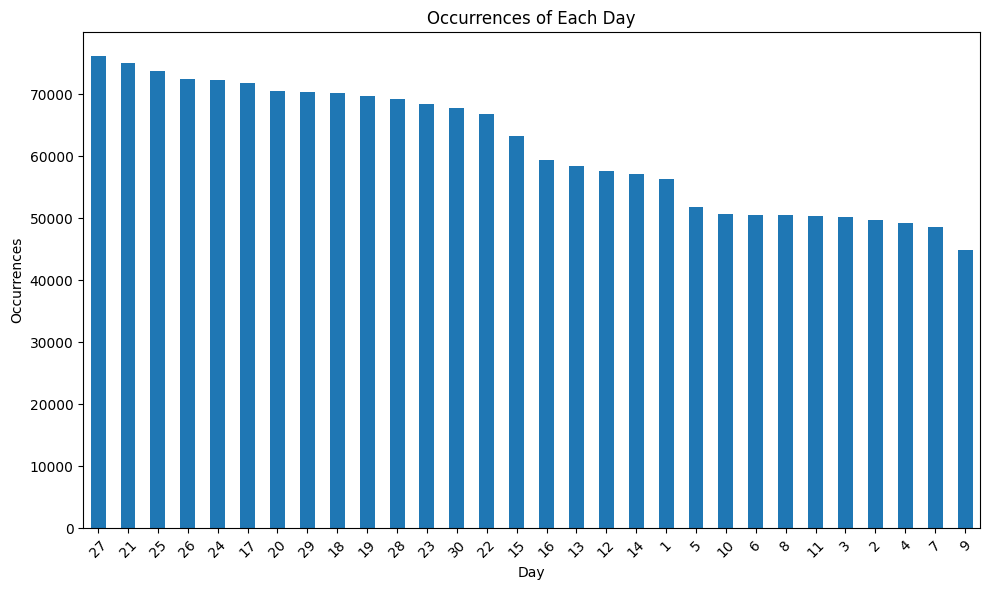

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each unique day
day_counts = dataset['Day'].value_counts()

# Plot the occurrences of each day
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Occurrences of Each Day')
plt.xlabel('Day')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

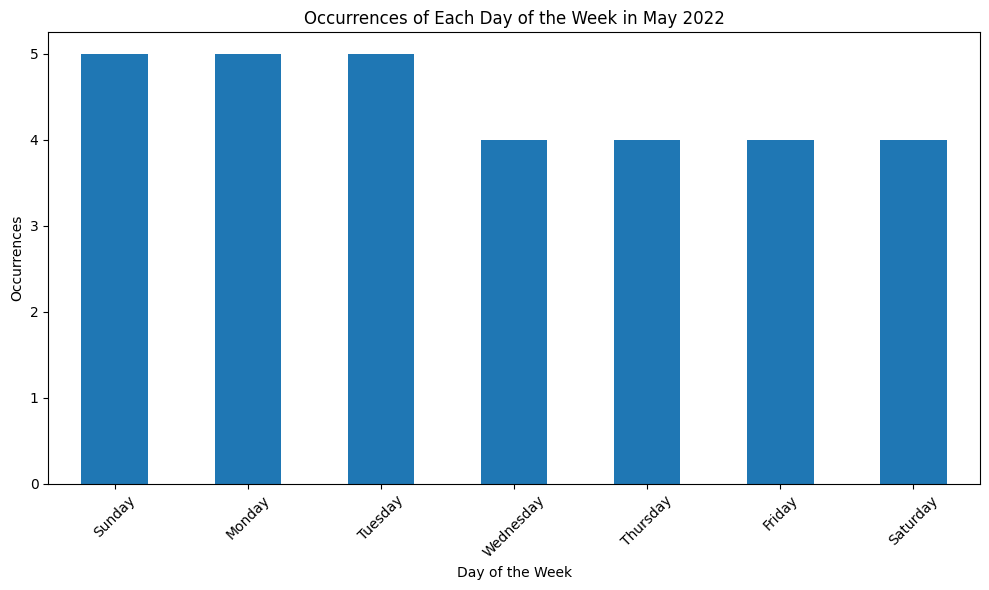

In [84]:
days_of_may = pd.DataFrame({'Day': range(1, 32)})

# Convert the 'Day' column to datetime data type
days_of_may['Date'] = pd.to_datetime('2022-05-' + days_of_may['Day'].astype(str))

# Extract the day of the week (e.g., Monday, Tuesday, etc.)
days_of_may['Day_of_week'] = days_of_may['Date'].dt.strftime('%A')

# Count the occurrences of each unique day of the week
day_of_week_counts = days_of_may['Day_of_week'].value_counts()

# Plot the occurrences of each day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Occurrences of Each Day of the Week in May 2022')
plt.xlabel('Day of the Week')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
dataset

,Alert,Time,Lat,Long,Vehicle,Speed,Day
0,cas_hmw,00:00:29,17.158688,79.306623,3867.0,55,1
1,cas_ldw,00:00:52,17.158928,79.309335,3867.0,60,1
2,cas_ldw,00:01:03,17.159078,79.310747,3867.0,67,1
3,cas_ldw,00:01:16,17.159457,79.314245,3867.0,73,1
4,cas_ldw,00:01:27,16.814285,80.246173,6123.0,61,1
...,...,...,...,...,...,...,...
1845991,cas_ldw,23:51:58,21.137266,79.341276,1750.0,59,30
1845992,cas_ldw,23:52:22,21.137074,79.336862,1750.0,63,30
1845993,cas_ldw,23:52:34,21.137024,79.335337,1750.0,63,30
1845994,cas_ldw,23:54:14,21.136556,79.321972,1750.0,56,30


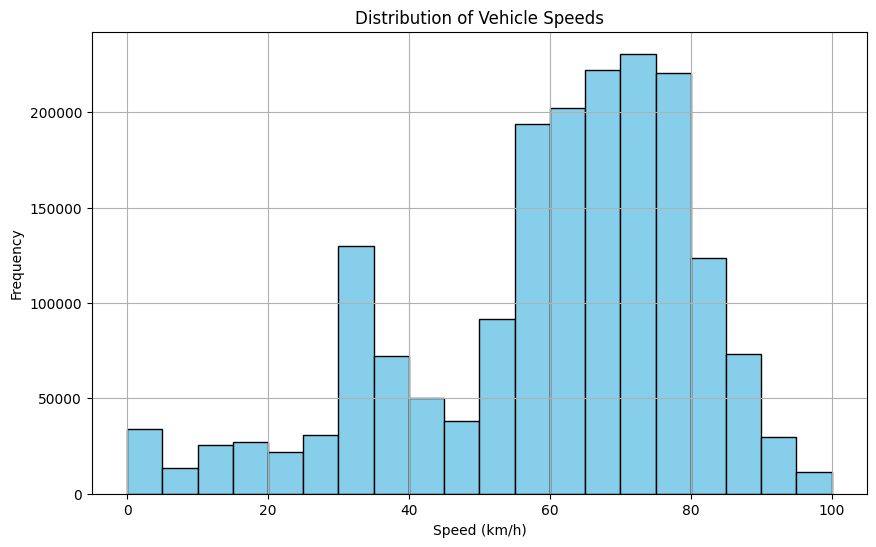

In [86]:
import matplotlib.pyplot as plt

# Plot a histogram of vehicle speeds
plt.figure(figsize=(10, 6))
plt.hist(dataset['Speed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Speeds')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_33/3232577231.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['Speed'], shade=True, color='blue')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


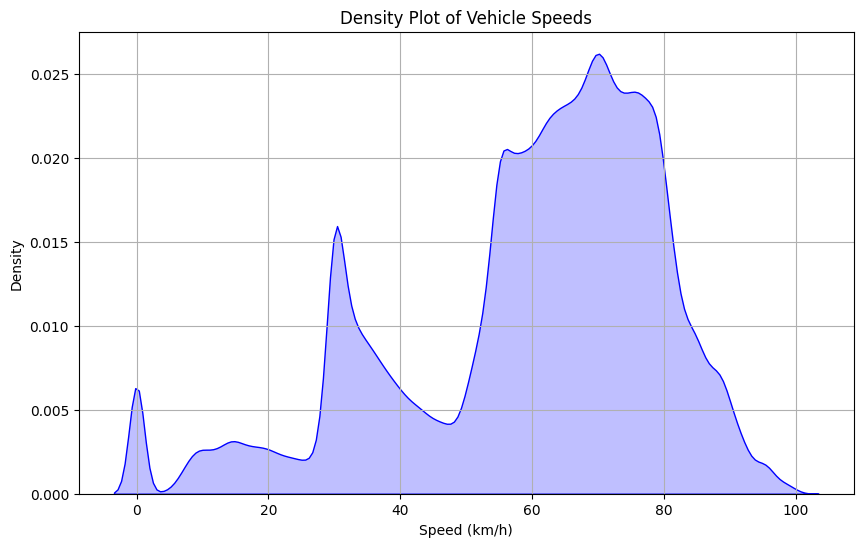

In [87]:
import seaborn as sns

# Plot a kernel density estimation (KDE) plot of vehicle speeds
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset['Speed'], shade=True, color='blue')
plt.title('Density Plot of Vehicle Speeds')
plt.xlabel('Speed (km/h)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [88]:
# Find the maximum speed for each vehicle
max_speeds = dataset.groupby('Vehicle')['Speed'].max()

# Calculate the average of the maximum speeds
average_highest_speed = max_speeds.mean()

print("Average highest speed:", average_highest_speed)


Average highest speed: 71.76656151419559


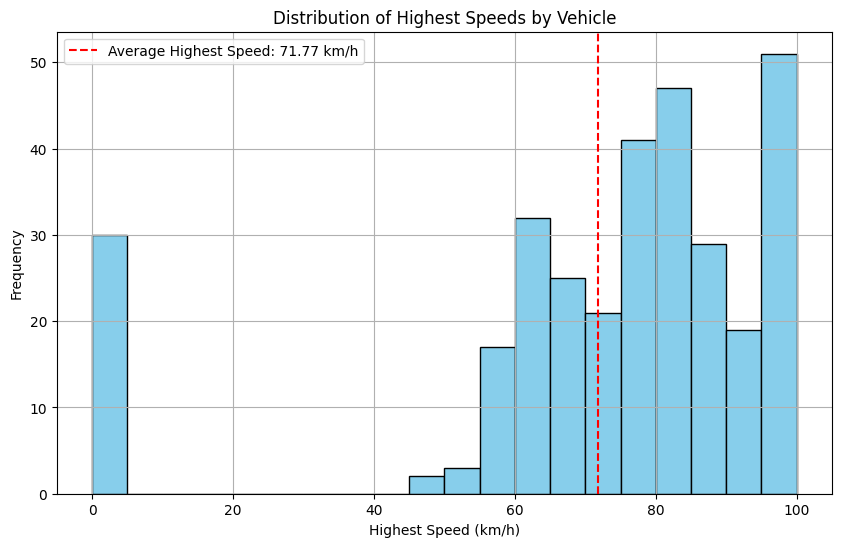

In [89]:
import matplotlib.pyplot as plt

# Calculate the highest speed for each vehicle
highest_speeds = dataset.groupby('Vehicle')['Speed'].max()

# Calculate the average of highest speeds
average_highest_speed = highest_speeds.mean()

# Visualize the distribution of highest speeds
plt.figure(figsize=(10, 6))
plt.hist(highest_speeds, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=average_highest_speed, color='red', linestyle='--', label=f'Average Highest Speed: {average_highest_speed:.2f} km/h')
plt.title('Distribution of Highest Speeds by Vehicle')
plt.xlabel('Highest Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


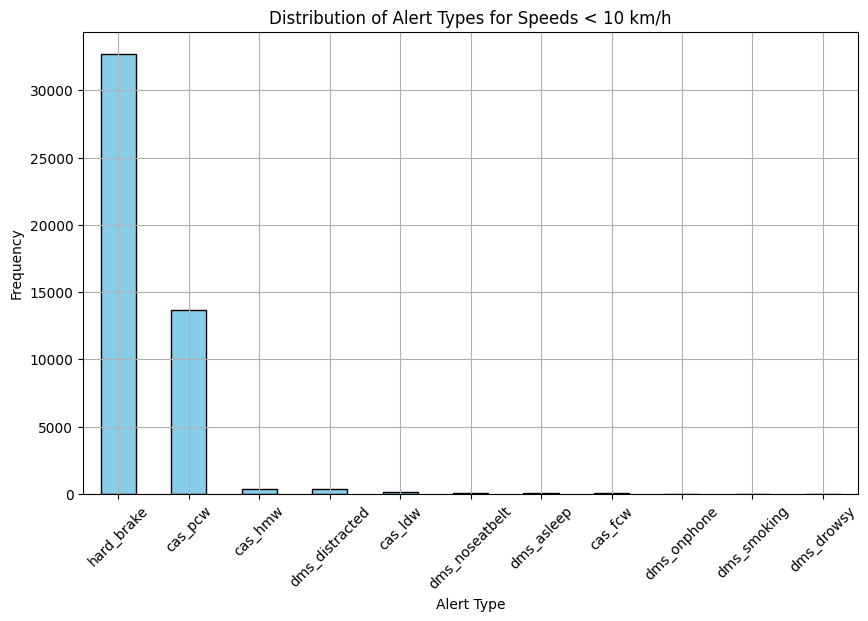

In [90]:
# Step 1: Filter Data
low_speed_events = dataset[dataset['Speed'] < 10]

# Step 2: Explore Attributes
# You can analyze different attributes in the low-speed events dataset
# For example, let's analyze the types of alerts associated with low speeds
alert_counts = low_speed_events['Alert'].value_counts()

# Step 3: Identify Patterns
# You can visualize the distribution of alert types associated with low speeds
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
alert_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Alert Types for Speeds < 10 km/h')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



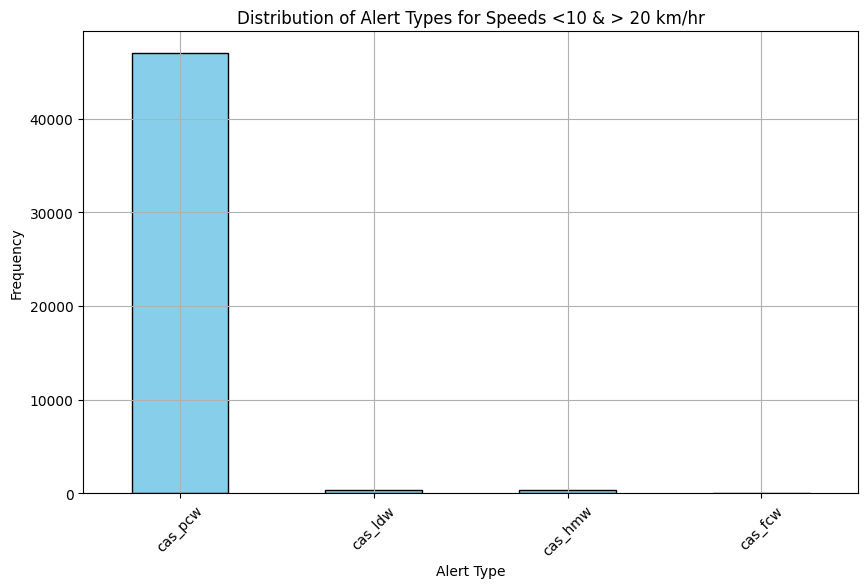

In [91]:

# Step 1: Filter the dataset for events with speeds above 20 km/hr
events_above_20kmph = dataset[(dataset['Speed'] < 20) & (dataset['Speed'] > 10 )]

# Step 2: Plot the distribution of alert types for the filtered dataset
alert_counts_above_20kmph = events_above_20kmph['Alert'].value_counts()

plt.figure(figsize=(10, 6))
alert_counts_above_20kmph.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Alert Types for Speeds <10 & > 20 km/hr')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.grid(True)
plt.show()



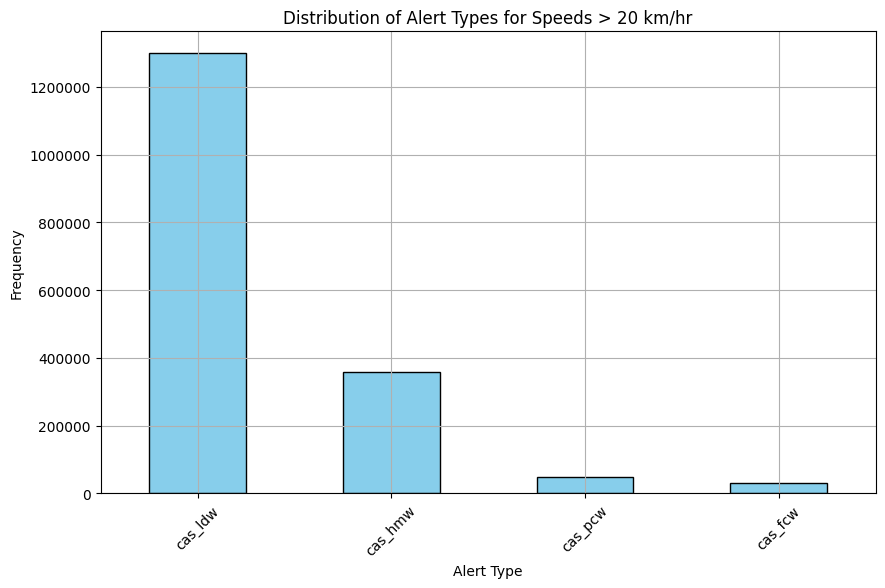

In [92]:

# Step 1: Filter the dataset for events with speeds above 20 km/hr
events_above_20kmph = dataset[dataset['Speed'] > 20]

# Step 2: Plot the distribution of alert types for the filtered dataset
alert_counts_above_20kmph = events_above_20kmph['Alert'].value_counts()

plt.figure(figsize=(10, 6))
alert_counts_above_20kmph.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Alert Types for Speeds > 20 km/hr')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.grid(True)
plt.show()



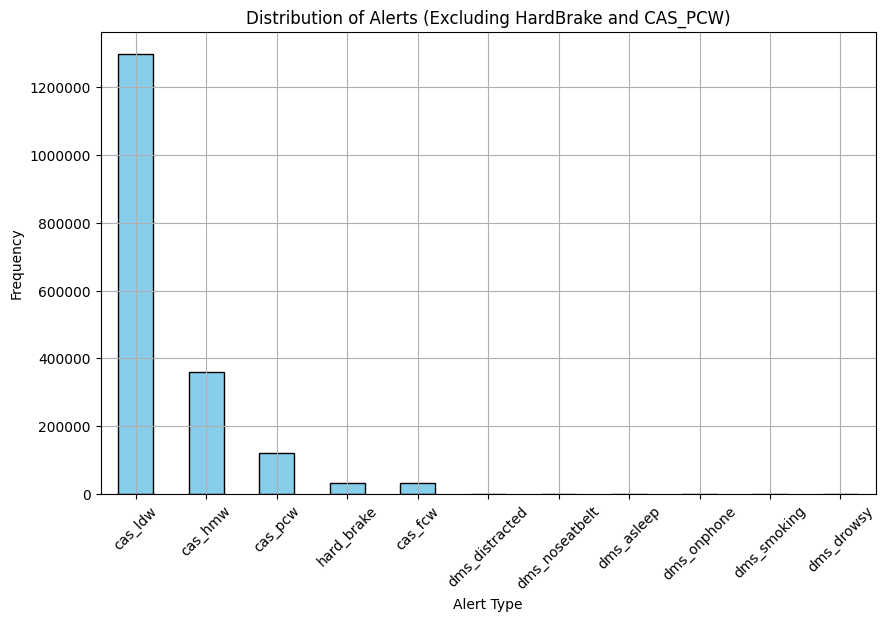

In [93]:
import matplotlib.pyplot as plt

# Step 1: Filter out the alerts to remove
alerts_to_remove = ['HardBrake', 'CAS_PCW']  # Specify the alerts to remove
filtered_dataset = dataset[~dataset['Alert'].isin(alerts_to_remove)]

# Step 2: Plot the distribution of remaining alerts
alert_counts = filtered_dataset['Alert'].value_counts()

plt.figure(figsize=(10, 6))
alert_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Alerts (Excluding HardBrake and CAS_PCW)')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis

plt.grid(True)
plt.show()


In [94]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [95]:
dataset

,Alert,Time,Lat,Long,Vehicle,Speed,Day
0,cas_hmw,00:00:29,17.158688,79.306623,3867.0,55,1
1,cas_ldw,00:00:52,17.158928,79.309335,3867.0,60,1
2,cas_ldw,00:01:03,17.159078,79.310747,3867.0,67,1
3,cas_ldw,00:01:16,17.159457,79.314245,3867.0,73,1
4,cas_ldw,00:01:27,16.814285,80.246173,6123.0,61,1
...,...,...,...,...,...,...,...
1845991,cas_ldw,23:51:58,21.137266,79.341276,1750.0,59,30
1845992,cas_ldw,23:52:22,21.137074,79.336862,1750.0,63,30
1845993,cas_ldw,23:52:34,21.137024,79.335337,1750.0,63,30
1845994,cas_ldw,23:54:14,21.136556,79.321972,1750.0,56,30


In [96]:
event_counts = dataset['Alert'].value_counts()

print(event_counts)

Alert
cas_ldw           1299101
cas_hmw            358549
cas_pcw            119525
hard_brake          32722
cas_fcw             32239
dms_distracted        328
dms_noseatbelt         71
dms_asleep             43
dms_onphone             6
dms_smoking             4
dms_drowsy              1
Name: count, dtype: int64


In [97]:
dataset

,Alert,Time,Lat,Long,Vehicle,Speed,Day
0,cas_hmw,00:00:29,17.158688,79.306623,3867.0,55,1
1,cas_ldw,00:00:52,17.158928,79.309335,3867.0,60,1
2,cas_ldw,00:01:03,17.159078,79.310747,3867.0,67,1
3,cas_ldw,00:01:16,17.159457,79.314245,3867.0,73,1
4,cas_ldw,00:01:27,16.814285,80.246173,6123.0,61,1
...,...,...,...,...,...,...,...
1845991,cas_ldw,23:51:58,21.137266,79.341276,1750.0,59,30
1845992,cas_ldw,23:52:22,21.137074,79.336862,1750.0,63,30
1845993,cas_ldw,23:52:34,21.137024,79.335337,1750.0,63,30
1845994,cas_ldw,23:54:14,21.136556,79.321972,1750.0,56,30


In [98]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.cluster import KMeans


# Preprocessing: Convert categorical variables into numerical format (if needed)
# Example: Convert 'Alert' column into numerical labels
dataset['Alert'] = pd.factorize(dataset['Alert'])[0]


# Preprocessing: Extract hour, minute, and second from the 'Time' column
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')
dataset['Hour'] = dataset['Time'].dt.hour
dataset['Minute'] = dataset['Time'].dt.minute
dataset['Second'] = dataset['Time'].dt.second

# Drop the original 'Time' column
dataset.drop(columns=['Time'], inplace=True)

coordinates = dataset[['Lat', 'Long']]
kmeans = KMeans(n_clusters=10, random_state=42)
dataset['Area'] = kmeans.fit_predict(coordinates)

# Drop the original latitude and longitude columns
dataset.drop(columns=['Lat', 'Long'], inplace=True)




/tmp/ipykernel_33/2658996980.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Alert'] = pd.factorize(dataset['Alert'])[0]
/tmp/ipykernel_33/2658996980.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')
/tmp/ipykernel_33/2658996980.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [101]:
dataset

,Alert,Vehicle,Speed,Day,Hour,Minute,Second,Area
0,0,3867.0,55,1,0,0,29,3
1,1,3867.0,60,1,0,0,52,3
2,1,3867.0,67,1,0,1,3,3
3,1,3867.0,73,1,0,1,16,3
4,1,6123.0,61,1,0,1,27,7
...,...,...,...,...,...,...,...,...
1845991,1,1750.0,59,30,23,51,58,1
1845992,1,1750.0,63,30,23,52,22,1
1845993,1,1750.0,63,30,23,52,34,1
1845994,1,1750.0,56,30,23,54,14,1


In [103]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = dataset[['Speed', 'Day', 'Area', "Hour", "Minute", "Second"]]  # Using multiple features for prediction
y = dataset['Alert']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier with multiclass objective (multi:softmax for classification with multiple classes)
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(dataset['Alert'].unique()), random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9149675185472623
